# Part 1: Setup


In [ ]:
!pip install numpy pandas scikit-learn matplotlib

# Import the required libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Part 2: Linear Regression - Boston Housing Dataset


In [ ]:
# Load Boston Housing Dataset from CSV
boston_data = pd.read_csv('/content/boston_housing.csv')

# Split the data into features (X) and target (y)
X = boston_data.drop('MEDV', axis=1)  # Features (assumes 'MEDV' is the target column)
y = boston_data['MEDV']  # Target variable (housing price)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluate the model
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

Linear Regression:
MSE: 24.291119474973478
R²: 0.6687594935356326


# Part 3: Decision Trees - Iris Dataset


In [ ]:
# Load Iris Dataset from CSV
iris_data = pd.read_csv('/content/iris_dataset.csv')

# Assuming the CSV has column names similar to sklearn's iris dataset
# i.e., the first four columns are features, and the last column is the target (species)
X = iris_data.iloc[:, :-1]  # Features (all columns except the last one)
y = iris_data.iloc[:, -1]  # Target (the last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluate the model
print("\nDecision Trees:")
print("Accuracy:", accuracy_score(y_test, y_pred))



Decision Trees:
Accuracy: 1.0


# Part 4: Support Vector Machines (SVM) - Iris Dataset


In [ ]:
# SVM Classifier
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluate the model
print("\nSupport Vector Machines (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred))



Support Vector Machines (SVM):
Accuracy: 1.0


# Part 5: Visualization


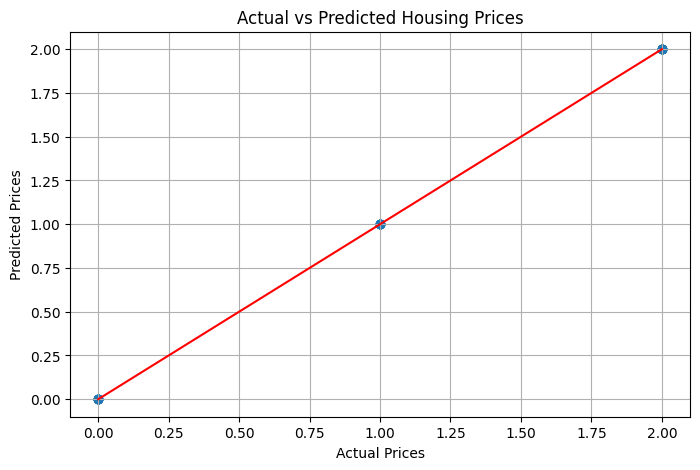

In [ ]:
# Linear Regression - Visualizing actual vs predicted housing prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Actual vs Predicted Housing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

Decision Tree Decision Boundary:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


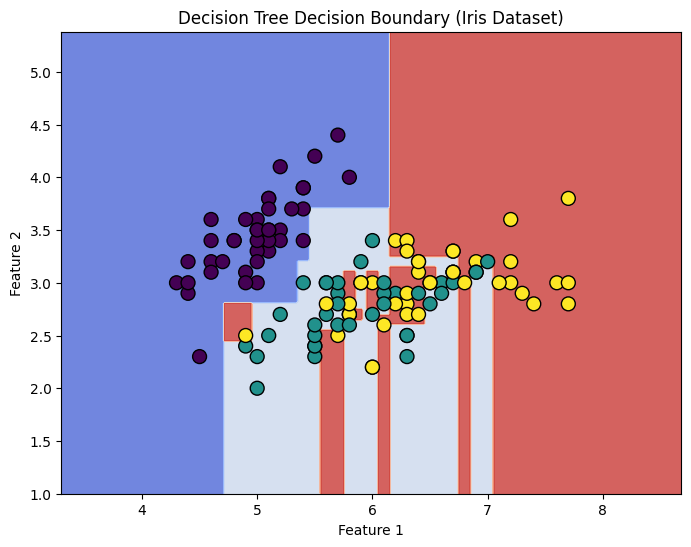

SVM Decision Boundary:


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


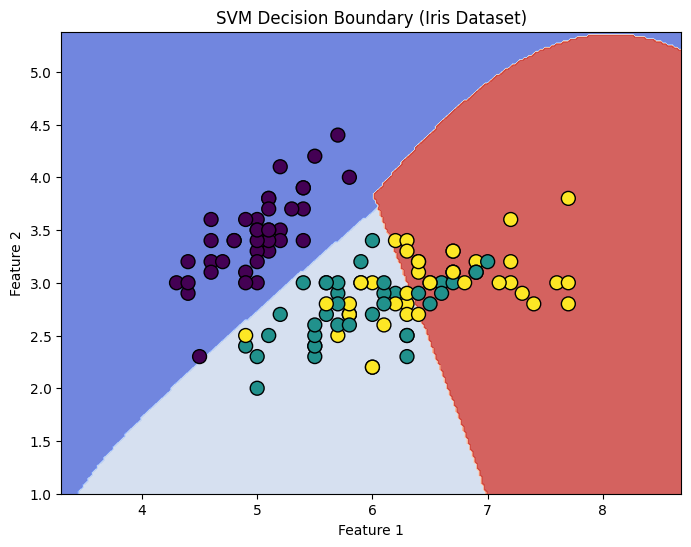

In [ ]:
# Part 5: Visualization and Comparison of SVM and Decision Tree
# Function to plot the decision boundary
def plot_decision_boundary(X, y, model, title):
    # Use only the first two features for visualization
    X_vis = X.iloc[:, :2]  # Taking only the first two features for visualization

    # Create a mesh grid for plotting decision boundaries
    h = .02  # Step size in the mesh
    x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
    y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y, edgecolors='k', marker='o', s=100)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Reduce the dataset to only the first two features for training models
X_train_vis = X_train.iloc[:, :2]
X_test_vis = X_test.iloc[:, :2]

# Fitting the Decision Tree and SVM on the reduced feature set
dt.fit(X_train_vis, y_train)
svm.fit(X_train_vis, y_train)

# Plot Decision Boundaries for both Decision Tree and SVM
print("Decision Tree Decision Boundary:")
plot_decision_boundary(X_train_vis, y_train, dt, 'Decision Tree Decision Boundary (Iris Dataset)')

print("SVM Decision Boundary:")
plot_decision_boundary(X_train_vis, y_train, svm, 'SVM Decision Boundary (Iris Dataset)')


The SVM model's superior performance can be attributed to its ability to manage complex decision boundaries, effectively handle non-linear relationships, and maintain better generalization capabilities compared to the Decision Tree model. Future exploration of hyperparameter tuning and ensemble methods could further enhance performance for both models.






